In [ ]:
import pandas as pd
df = pd.read_csv('/content/Health_insurance (1).csv')
df.shape

(1177, 12)

In [ ]:
df.head()

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19,female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28,male,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drop duplicates

In [ ]:
df = df.drop_duplicates(subset=['pid'])

In [ ]:
df.columns

Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
pid,0
age,0
sex,2
bmi,3
children,0
smoker,0
region,0
diabetes,0
heart rate,13
Creatinine,0


remove outliers

In [ ]:
import numpy as np
#assuming 'df' is your dataframe and contains numeric columns you want to process.
def remove_outliers_iqr(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column]>= lower_bound) & (df[column]<= upper_bound)]
  return df_filtered

numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
  df = remove_outliers_iqr(df,col)

In [ ]:
df.isnull().sum()

,0
pid,0
age,0
sex,1
bmi,0
children,0
smoker,0
region,0
diabetes,0
heart rate,0
Creatinine,0


In [ ]:
#drop rows having NA values in charges column
df = df.dropna(subset=['charges'])

In [ ]:
df.columns

Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges'],
      dtype='object')

In [ ]:
#create the list of columns to fill NA values
columns_to_fill = ['bmi','heart rate','glucose'] #example columns, replace with your actual columns

#fill NA values in specified columns with the mean of each column
for col in columns_to_fill:
  df[col].fillna(df[col].mean(),inplace=True)


/tmp/ipython-input-3322488393.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


cleaning categorical columns

In [ ]:
category_cols = df.select_dtypes(include=['object']).columns

for col in category_cols:
  print(df[col].unique())

['female' 'male' nan]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
#replace 'Female' with 'female' in sex columns
#dict1 ={'Female':'female','mal':'male'}
#df['sex'] = df['sex'].replace(dict1)
#calculate the mode of the column
mode_value = df['sex'].mode([0])
#replace NaN values with the mode
df['sex'].fillna(mode_value[0],inplace=True)


/tmp/ipython-input-492419924.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(mode_value[0],inplace=True)


In [ ]:
#one_hot ecode the sex, smoker, region, column data
df = pd.get_dummies(df,columns=['sex','smoker','region'])

In [ ]:
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
2,3,28,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False
5,6,31,25.740,0,0,74.181818,1.612500,98.333333,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
#normalise numerical columns
#store min-max values for later use
min_max_values = {}
cols = ['age','bmi','heart rate','Creatinine','glucose']
for i in cols:
  min_val = df[i].min()
  max_val = df[i].max()
  df[i] = (df[i]-df[i].min())/(df[i].max()-df[i].min())
  min_max_values[i] = (min_val,max_val)


In [ ]:
min_max_values

{'age': (18, 64),
 'bmi': (15.96, 47.52),
 'heart rate': (39.32142857, 129.125),
 'Creatinine': (0.266666667, 3.311111111),
 'glucose': (69.1, 252.0)}

In [ ]:
#save to a JSON file
import json
with open('min_max_values.json','w') as json_file:
  json.dump(min_max_values, json_file)

In [ ]:
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0.021739,0.378327,0,1,0.328677,0.555657,0.248969,16884.92400,True,False,False,True,False,False,False,True
2,3,0.217391,0.539924,3,0,0.367433,0.527112,0.436851,4449.46200,False,True,True,False,False,False,True,False
3,4,0.326087,0.213720,0,0,0.614436,0.104797,0.323401,21984.47061,False,True,True,False,False,True,False,False
4,5,0.304348,0.409379,0,0,0.318457,0.552920,0.419081,3866.85520,False,True,True,False,False,True,False,False
5,6,0.282609,0.309886,0,0,0.388185,0.442062,0.159832,3756.62160,True,False,True,False,False,False,True,False


In [ ]:
df.corr()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.020475,-0.003511,0.014026,0.047045,0.064814,0.040316,0.052704,0.023309,-0.036572,0.036572,0.005622,-0.005622,0.014203,0.016058,-0.042186,0.012234
age,0.020475,1.000000,0.129860,0.028331,0.098091,-0.028978,0.027501,0.056262,0.405246,0.048346,-0.048346,0.082533,-0.082533,-0.002207,0.002779,-0.016891,0.016366
bmi,-0.003511,0.129860,1.000000,-0.002198,-0.035384,-0.053729,0.062161,-0.010598,-0.065636,-0.025650,0.025650,0.263388,-0.263388,-0.116904,-0.122601,0.240479,-0.003067
children,0.014026,0.028331,-0.002198,1.000000,-0.021114,-0.046365,0.029730,0.007067,0.055658,0.011317,-0.011317,-0.005000,0.005000,-0.016229,0.014552,-0.013171,0.014714
diabetes,0.047045,0.098091,-0.035384,-0.021114,1.000000,-0.142411,0.142499,0.319982,0.023603,0.004387,-0.004387,0.008049,-0.008049,0.026009,0.009529,-0.010164,-0.025072
heart rate,0.064814,-0.028978,-0.053729,-0.046365,-0.142411,1.000000,-0.195500,-0.024848,-0.003080,0.015473,-0.015473,-0.035912,0.035912,0.039870,-0.077237,0.068231,-0.030631
Creatinine,0.040316,0.027501,0.062161,0.029730,0.142499,-0.195500,1.000000,0.043254,0.054792,-0.010179,0.010179,0.021797,-0.021797,-0.037394,-0.018781,0.061877,-0.006335
glucose,0.052704,0.056262,-0.010598,0.007067,0.319982,-0.024848,0.043254,1.000000,-0.007643,-0.073815,0.073815,0.058342,-0.058342,0.019260,-0.004513,-0.004741,-0.009778
charges,0.023309,0.405246,-0.065636,0.055658,0.023603,-0.003080,0.054792,-0.007643,1.000000,0.023153,-0.023153,-0.598446,0.598446,0.074291,0.023936,-0.033311,-0.064027
sex_female,-0.036572,0.048346,-0.025650,0.011317,0.004387,0.015473,-0.010179,-0.073815,0.023153,1.000000,-1.000000,0.021720,-0.021720,-0.017477,0.008297,0.008301,0.000648


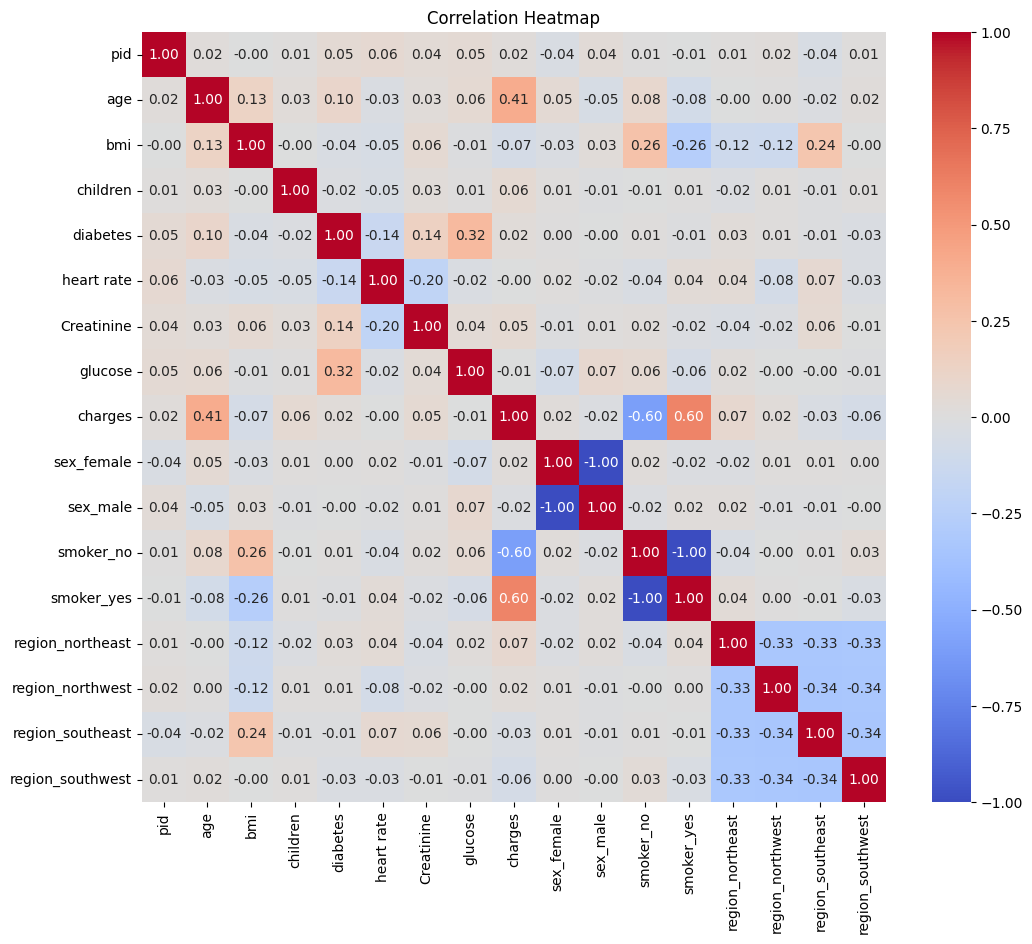

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#assuming  'df' is your dataframe
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#seperate the features and target variables
X = df.drop(columns=['charges','pid','sex_male','smoker_yes'], axis = 1)
y = df['charges']

In [ ]:
#split data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

linear regression

In [ ]:
#linear regression model to predict outcome

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
#predict the target variable for the test set
y_pred = reg.predict(X_test)

In [ ]:
#compute the rmse, r2 score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print('RMSE:',rmse)
print('R2 Score:',r2)


RMSE: 4905.808013732796
R2 Score: 0.5255632765872602


In [ ]:
pd.DataFrame(X.columns,reg.coef_)

,0
11027.830455,age
2231.640089,bmi
293.794626,children
-220.818740,diabetes
-864.882220,heart rate
2685.968400,Creatinine
-199.906804,glucose
265.751726,sex_female
-15455.054390,smoker_no
792.282164,region_northeast


In [ ]:
x_test_sample = X_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1,-1)

In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_sample

array([11357.54829343])

In [ ]:
#to save model
import joblib
joblib.dump(reg,'linear_regression_model.pkl')


['linear_regression_model.pkl']